In [1]:
import os
import typing
from typing import List, Tuple, Dict
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos"

Mounted at /content/drive
/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos


In [2]:
def calling_audios(data_path:str)->List[str]:
    '''
        Cargando los nombres de los audios
    '''
    names = list()
    for dirname, _, filenames in os.walk(data_path):
        for filename in filenames:
            names.append(filename)
    return names

In [3]:
data_path_train = "/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos/IRMAS-Sample/Training"
training_names = calling_audios(data_path_train)

In [4]:
y, sr = librosa.load(data_path_train+'/sax/118__[sax][nod][jaz_blu]1702__3.wav',sr=22050)

In [5]:
len(y)

66150

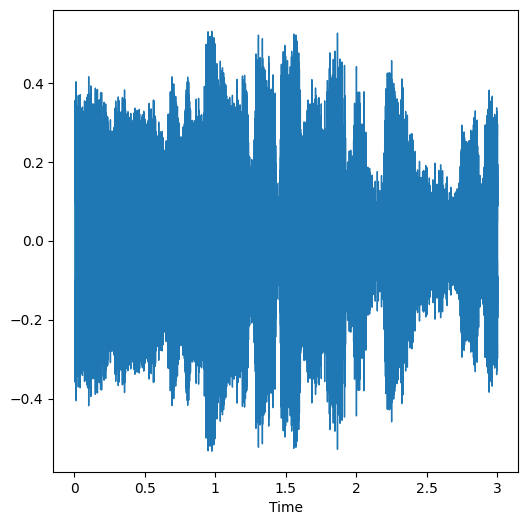

In [6]:
plt.figure(figsize=(6,6))
librosa.display.waveshow(y)

In [7]:
print(list(range(0,7,2)))

[0, 2, 4, 6]


In [8]:
def amplitud_de_la_envolvente(y:np.array, tamano_frame:int):
  '''
    Calcula la amplitud de la envolvente de una señal de audio,
    dado un tamaño fijo para cada frame.
  '''
  amplitud_de_la_envolvente = []

  # El tamaño de la señal con saltos de tamano_frame
  for i in range(0,len(y),tamano_frame):

    envolvente_del_frame_i = max(y[i:i+tamano_frame])
    amplitud_de_la_envolvente.append(envolvente_del_frame_i)

  return np.array(amplitud_de_la_envolvente)

Caso sin Overlap o ```hop_length```

In [9]:
tamano_frame = 1024
envolvente_senal = amplitud_de_la_envolvente(y, tamano_frame)
len(envolvente_senal)

65

In [10]:
tamano_frame = 512
envolvente_senal = amplitud_de_la_envolvente(y, tamano_frame)
len(envolvente_senal)

130

Caso con overlap

In [11]:
def amplitud_de_la_envolvente_overlap(y:np.array, frame_size:int, hop_length: int):
  '''
    Calcula la amplitud de la envolvente de una señal de audio,
    dado un tamaño fijo para cada frame.
  '''
  amplitud_de_la_envolvente = []

  # El tamaño de la señal con saltos de frame_size
  for i in range(0,len(y),hop_length):

    envolvente_del_frame_i = max(y[i:i+frame_size])
    amplitud_de_la_envolvente.append(envolvente_del_frame_i)

  return np.array(amplitud_de_la_envolvente)

In [12]:
tamano_frame = 1024
hop_length = 512
envolvente_senal = amplitud_de_la_envolvente_overlap(y, tamano_frame,hop_length)
len(envolvente_senal)

130

In [13]:
tamano_frame = 512
envolvente_senal = amplitud_de_la_envolvente_overlap(y, tamano_frame,hop_length)
len(envolvente_senal)

130

Una versión comprimida utilizando listas de comprensión

In [14]:
def version_pythonica(y:np.array, frame_size:int, hop_length: int):
  return  np.array([max(y[i:i+frame_size]) for i in range(0,len(y),hop_length)])

In [15]:
(version_pythonica(y, tamano_frame, hop_length) == amplitud_de_la_envolvente_overlap(y, tamano_frame,hop_length)).all()

True

Visualicemos

In [16]:
tamano_frame = 256
hop_length = 128
envolvente_senal = amplitud_de_la_envolvente_overlap(y, tamano_frame,hop_length)
frames = range(0,envolvente_senal.size)
t = librosa.frames_to_time(frames, hop_length = hop_length)

(-1.0, 1.0)

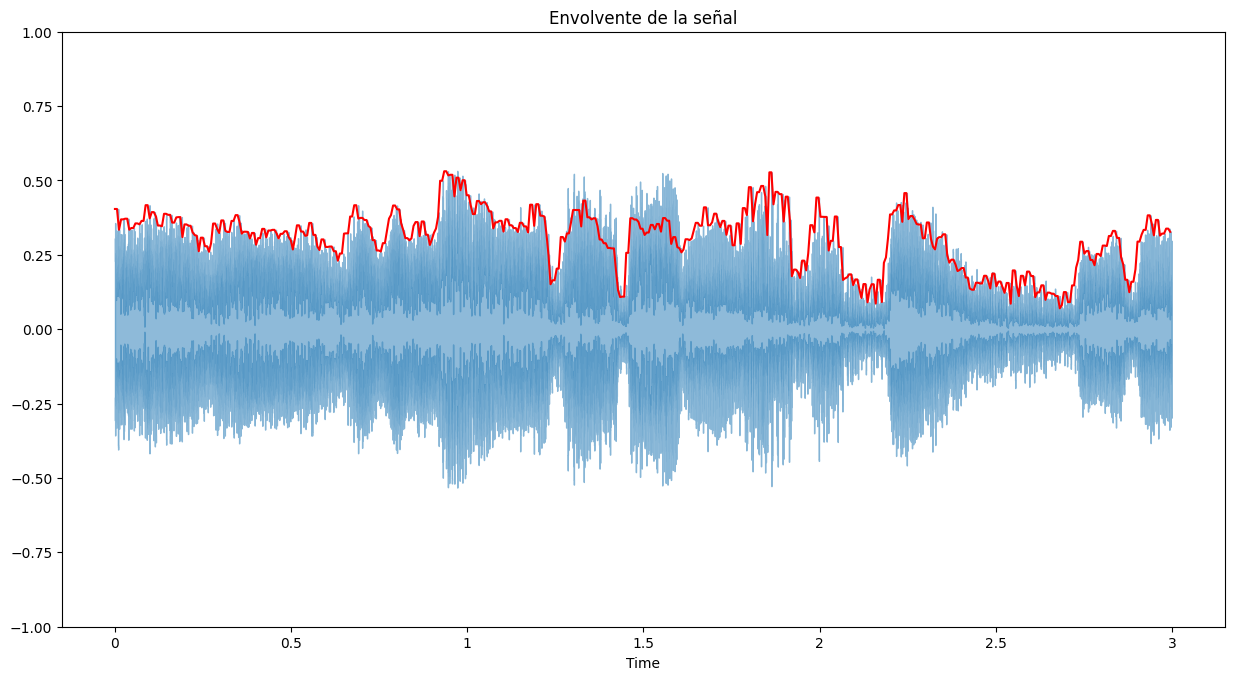

In [17]:
plt.figure(figsize = (15,17))
plt.subplot(2,1,1)
librosa.display.waveshow(y,alpha=0.5)
plt.plot(t,envolvente_senal, color = 'r')
plt.title('Envolvente de la señal')
plt.ylim((-1,1))